In [1]:
import tensorflow as tf  # Import TensorFlow library for building and training machine learning models
import matplotlib.pyplot as plt  # Import Matplotlib's pyplot module for data visualization (plotting graphs/images)


###  Step 1: Import Libraries

- `tensorflow` is a popular open-source deep learning library.
- `matplotlib.pyplot` helps us visualize digit images.

In [2]:
mnist = tf.keras.datasets.mnist  # Load the MNIST dataset (handwritten digit images) from TensorFlow's built-in datasets


###  Step 2: Load the MNIST Dataset

- TensorFlow provides the MNIST dataset, which contains 70,000 handwritten digit images (28x28 pixels).

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load MNIST data into training and testing sets; x = images, y = labels


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###  Step 3: Split the Dataset

- `x_train`, `y_train`: 60,000 training images and labels.
- `x_test`, `y_test`: 10,000 testing images and labels.


In [4]:
x_train = x_train / 255.0  # Normalize training images to range [0, 1] for better model performance
x_test = x_test / 255.0    # Normalize testing images to range [0, 1] for consistency during evaluation


###  Step 4: Normalize the Data

- Image pixels range from 0 to 255.
- We scale them to 0–1 range to improve model training.


In [5]:
model = tf.keras.models.Sequential([  # Create a Sequential model (layers are stacked in sequence)
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array of 784 pixels
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons, using ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit 0-9), using softmax for probability distribution
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###  Step 5: Build the Neural Network

- `Flatten`: Converts 2D image (28x28) to 1D array (784).
- `Dense(128, relu)`: Hidden layer with 128 neurons using ReLU activation.
- `Dense(10, softmax)`: Output layer with 10 neurons for 10 digits (0–9), using softmax to give probabilities.


In [6]:
model.compile(optimizer='adam',                      # Use Adam optimizer to adjust weights during training
              loss='sparse_categorical_crossentropy', # Loss function for multi-class classification with integer labels
              metrics=['accuracy'])                   # Track accuracy as the evaluation metric


###  Step 6: Compile the Model

- `optimizer='adam'`: Efficient optimizer for training.
- `loss='sparse_categorical_crossentropy'`: Used when labels are integers.
- `metrics=['accuracy']`: Track accuracy during training/testing.


In [7]:
model.fit(x_train, y_train, epochs=5)  # Train the model on training data for 5 complete passes (epochs) over the dataset


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8780 - loss: 0.4302
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9637 - loss: 0.1240
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9754 - loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0559
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0430


###  Step 7: Train the Model

- We train the model using the training data for 5 epochs (5 full passes through the data).


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)  # Evaluate the model on the test dataset to get loss and accuracy
print('\nTest Accuracy:', test_acc)  # Display the accuracy of the model on unseen test data


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.0919

Test Accuracy: 0.9750999808311462


###  Step 8: Evaluate the Model

- `evaluate()` tests model performance on unseen test data.
- Returns the loss and accuracy of the model.


In [9]:
predictions = model.predict(x_test)  # Generate predicted probabilities for each class on the test dataset


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


###  Step 9: Predict Digits

- Generates predictions for each image in the test set.
- Each prediction gives probability values for digits 0 through 9.


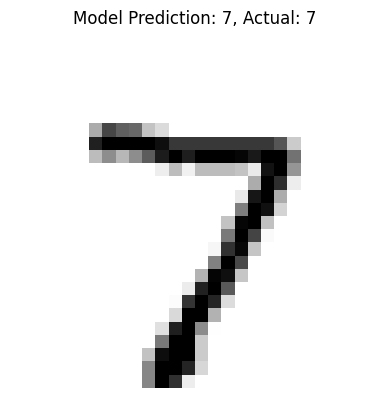

In [10]:
plt.imshow(x_test[0], cmap=plt.cm.binary)  # Display the first test image in black-and-white (binary) color map
plt.title(f"Model Prediction: {tf.argmax(predictions[0])}, Actual: {y_test[0]}")  # Set title showing predicted class and actual label
plt.axis('off')  # Hide the axis for cleaner visualization
plt.show()  # Display the image with the title


###  Step 10: Visualize the Prediction

- Shows the first digit from the test set.
- Displays the predicted digit and actual digit for comparison.
